## 1. Install Library

In [1]:
! pip install pycaret==2.3.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 319 kB 5.0 MB/s 
     |████████████████████████████████| 17.8 MB 63.4 MB/s 
     |████████████████████████████████| 56 kB 4.6 MB/s 
     |████████████████████████████████| 262 kB 73.4 MB/s 
     |████████████████████████████████| 2.0 MB 55.5 MB/s 
     |████████████████████████████████| 1.7 MB 46.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 88 kB 7.8 MB/s 
     |████████████████████████████████| 1.3 MB 68.1 MB/s 
     |████████████████████████████████| 120 kB 59.5 MB/s 
     |████████████████████████████████| 167 kB 66.3 MB/s 
     |████████████████████████████████| 10.4 MB 41.7 MB/s 
     |████████████████████████████████| 6.8 MB 66.7 MB/s 
     |████████████████████████████████|

In [2]:
! pip uninstall pandas-profiling
! pip install pandas-profiling==1.4.1

Found existing installation: pandas-profiling 3.2.0
Uninstalling pandas-profiling-3.2.0:
  Would remove:
    /usr/local/bin/pandas_profiling
    /usr/local/lib/python3.7/dist-packages/pandas_profiling-3.2.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/pandas_profiling/*
Proceed (y/n)? ㅛ
Your response ('ㅛ') was not one of the expected responses: y, n
Proceed (y/n)? ㅛ
Your response ('ㅛ') was not one of the expected responses: y, n
Proceed (y/n)? y
  Successfully uninstalled pandas-profiling-3.2.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 2.3.9 requires pandas-profiling>=2.8.0, but you have pandas-profiling 1.4.1 which is incompatible.


In [3]:
! pip uninstall MarkupSafe
! pip install MarkupSafe==2.0.1

Found existing installation: MarkupSafe 2.1.1
Uninstalling MarkupSafe-2.1.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/MarkupSafe-2.1.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/markupsafe/*
Proceed (y/n)? y
  Successfully uninstalled MarkupSafe-2.1.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from pycaret.regression import *
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


## 2. Data Setup

In [17]:
df = pd.read_csv('/content/dataset.csv', encoding="UTF-8")
print(df.head())
print(df.columns)

     d(Å)   FWHM  Crystallite size  PL wavelength
0  2.6903  0.312         26.575087            449
1  2.7200  0.342         24.220445            449
2  2.6931  0.242         34.258970            449
3  2.6916  0.317         26.154762            449
4  2.6930  0.253         32.769450            449
Index(['d(Å)', 'FWHM', 'Crystallite size', 'PL wavelength'], dtype='object')


In [18]:
df.shape

(60, 4)

In [19]:
#import seaborn as sns
sns.set(font_scale=1.1)
plt.figure(figsize=(9,8))
corr= df.corr()
sns.heatmap(corr, annot=True, square=False, vmin=-1.0, vmax=1.0, cmap="BuGn",annot_kws={"size": 20}); #annot parameter fills the cells with the relative correlation coefficient, which ranges from -1 to 1
plt.savefig("test.png")

In [9]:
MachineLearning_Model = setup(data = df, target = 'Wavelength', session_id=123, train_size = 0.8,
                   log_experiment = True, experiment_name = 'Crystal_Structure_PL-Prediction')

,Description,Value
0,session_id,123
1,Target,Wavelength
2,Original Data,"(60, 4)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(48, 3)"


2022/06/23 08:34:40 INFO mlflow.tracking.fluent: Experiment with name 'Crystal_Structure_PL-Prediction' does not exist. Creating a new experiment.


## 3. Modeling & Validating

In [20]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,0.6284,0.8638,0.7706,0.9580,0.0017,0.0014,0.035
rf,Random Forest Regressor,0.5465,0.6080,0.6948,0.9566,0.0015,0.0012,0.265
et,Extra Trees Regressor,0.5637,0.6201,0.7285,0.9453,0.0016,0.0012,0.206
gbr,Gradient Boosting Regressor,0.5559,0.9986,0.8152,0.9404,0.0018,0.0012,0.022
knn,K Neighbors Regressor,0.7830,1.1462,0.9771,0.9004,0.0021,0.0017,0.040
dt,Decision Tree Regressor,0.6650,2.0650,1.0521,0.8598,0.0023,0.0015,0.013
huber,Huber Regressor,1.3912,4.7825,1.8747,0.7764,0.0041,0.0030,0.016
lr,Linear Regression,1.4414,3.9054,1.8484,0.6660,0.0040,0.0032,0.290
lar,Least Angle Regression,1.4414,3.9056,1.8485,0.6659,0.0040,0.0032,0.013
lightgbm,Light Gradient Boosting Machine,2.0988,7.5999,2.6895,0.2587,0.0059,0.0046,0.041


AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=123)

In [21]:
ada = create_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.2333,4.2076,2.0512,0.8605,0.0044,0.0027
1,0.3814,0.1582,0.3977,0.9753,0.0009,0.0008
2,1.0705,1.4772,1.2154,0.9557,0.0027,0.0024
3,0.9893,1.0684,1.0336,0.9461,0.0022,0.0022
4,0.3593,0.1904,0.4364,0.9929,0.0010,0.0008
5,0.6879,0.5740,0.7576,0.9840,0.0017,0.0015
6,0.7194,0.5949,0.7713,0.9494,0.0017,0.0016
7,0.2961,0.1132,0.3364,0.9628,0.0007,0.0007
8,0.2239,0.0925,0.3041,0.9782,0.0007,0.0005


In [22]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.7060,0.8402,0.9166,0.9721,0.0020,0.0015
1,0.4040,0.2137,0.4623,0.9666,0.0010,0.0009
2,0.9880,1.4284,1.1952,0.9572,0.0026,0.0022
3,0.6060,0.5562,0.7458,0.9720,0.0016,0.0013
4,0.3340,0.2092,0.4574,0.9922,0.0010,0.0007
5,0.5180,0.4193,0.6475,0.9883,0.0014,0.0011
6,1.1120,1.9823,1.4079,0.8314,0.0031,0.0024
7,0.2620,0.2007,0.4480,0.9340,0.0010,0.0006
8,0.3350,0.1545,0.3930,0.9637,0.0009,0.0007


In [23]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.7100,0.7204,0.8488,0.9761,0.0019,0.0016
1,0.3820,0.1794,0.4236,0.9720,0.0009,0.0008
2,0.9880,1.4320,1.1967,0.9571,0.0026,0.0022
3,0.7340,0.6894,0.8303,0.9653,0.0018,0.0016
4,0.2580,0.1550,0.3937,0.9943,0.0009,0.0006
5,0.7140,0.7696,0.8773,0.9785,0.0019,0.0016
6,0.9260,1.2921,1.1367,0.8901,0.0025,0.0020
7,0.4650,0.6775,0.8231,0.7771,0.0018,0.0010
8,0.2775,0.1597,0.3997,0.9624,0.0009,0.0006


In [24]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.9163,2.5098,1.5842,0.9168,0.0034,0.0020
1,0.3953,0.2634,0.5133,0.9588,0.0011,0.0009
2,1.0240,1.7080,1.3069,0.9488,0.0029,0.0022
3,0.6994,0.7066,0.8406,0.9644,0.0018,0.0015
4,0.3990,0.3271,0.5719,0.9879,0.0012,0.0009
5,0.5576,0.8168,0.9038,0.9772,0.0020,0.0012
6,1.2280,3.3966,1.8430,0.7112,0.0040,0.0027
7,0.0347,0.0034,0.0584,0.9989,0.0001,0.0001
8,0.2829,0.2534,0.5034,0.9404,0.0011,0.0006


In [25]:
knn = create_model('knn')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.8400,1.4320,1.1967,0.9525,0.0026,0.0018
1,0.4800,0.2720,0.5215,0.9575,0.0012,0.0011
2,0.7200,1.1200,1.0583,0.9664,0.0023,0.0016
3,1.2400,2.0720,1.4394,0.8956,0.0031,0.0027
4,0.6000,0.5360,0.7321,0.9801,0.0016,0.0013
5,0.7600,0.7600,0.8718,0.9788,0.0019,0.0017
6,1.6000,3.8240,1.9555,0.6748,0.0042,0.0035
7,0.6400,0.8960,0.9466,0.7053,0.0021,0.0014
8,0.4500,0.2700,0.5196,0.9365,0.0011,0.0010


In [26]:
top5 = compare_models(sort='R2', n_select=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,0.6284,0.8638,0.7706,0.9580,0.0017,0.0014,0.037
rf,Random Forest Regressor,0.5465,0.6080,0.6948,0.9566,0.0015,0.0012,0.252
et,Extra Trees Regressor,0.5637,0.6201,0.7285,0.9453,0.0016,0.0012,0.218
gbr,Gradient Boosting Regressor,0.5559,0.9986,0.8152,0.9404,0.0018,0.0012,0.022
knn,K Neighbors Regressor,0.7830,1.1462,0.9771,0.9004,0.0021,0.0017,0.038
dt,Decision Tree Regressor,0.6650,2.0650,1.0521,0.8598,0.0023,0.0015,0.014
huber,Huber Regressor,1.3912,4.7825,1.8747,0.7764,0.0041,0.0030,0.021
lr,Linear Regression,1.4414,3.9054,1.8484,0.6660,0.0040,0.0032,0.010
lar,Least Angle Regression,1.4414,3.9056,1.8485,0.6659,0.0040,0.0032,0.011
lightgbm,Light Gradient Boosting Machine,2.0988,7.5999,2.6895,0.2587,0.0059,0.0046,0.013


In [27]:
top5

[AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                   n_estimators=50, random_state=123),
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False),
 ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                

In [28]:
blender_top5 = blend_models(estimator_list=top5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.8668,1.6192,1.2725,0.9463,0.0028,0.0019
1,0.2605,0.1247,0.3531,0.9805,0.0008,0.0006
2,0.9243,1.2945,1.1378,0.9612,0.0025,0.0020
3,0.6948,0.7549,0.8689,0.9619,0.0019,0.0015
4,0.2672,0.1426,0.3776,0.9947,0.0008,0.0006
5,0.6199,0.4919,0.7014,0.9863,0.0016,0.0014
6,1.0866,1.9014,1.3789,0.8383,0.0030,0.0024
7,0.3007,0.2143,0.4629,0.9295,0.0010,0.0007
8,0.2665,0.1180,0.3435,0.9722,0.0008,0.0006


In [29]:
blender_top5

VotingRegressor(estimators=[('ada',
                             AdaBoostRegressor(base_estimator=None,
                                               learning_rate=1.0, loss='linear',
                                               n_estimators=50,
                                               random_state=123)),
                            ('rf',
                             RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
              

In [30]:
final_model_1 = finalize_model(blender_top5)

In [31]:
prediction = predict_model(final_model_1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.2066,0.07,0.2646,0.9948,0.0006,0.0005


In [33]:
from pycaret.utils import check_metric
check_metric(prediction['Wavelength'], prediction['Label'], metric = 'R2')

0.9948

In [34]:
stack_top5 = stack_models(estimator_list=top5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.4327,3.0874,1.7571,0.8976,0.0038,0.0031
1,0.4468,0.3262,0.5711,0.9490,0.0013,0.0010
2,1.0964,1.6607,1.2887,0.9502,0.0028,0.0024
3,0.7030,0.6047,0.7776,0.9695,0.0017,0.0015
4,0.5215,0.4396,0.6630,0.9837,0.0014,0.0011
5,0.6091,0.5173,0.7192,0.9856,0.0016,0.0014
6,0.6758,0.5542,0.7444,0.9529,0.0016,0.0015
7,0.3412,0.1721,0.4148,0.9434,0.0009,0.0008
8,0.2387,0.0793,0.2816,0.9813,0.0006,0.0005


In [35]:
stack_top5

StackingRegressor(cv=5,
                  estimators=[('ada',
                               AdaBoostRegressor(base_estimator=None,
                                                 learning_rate=1.0,
                                                 loss='linear', n_estimators=50,
                                                 random_state=123)),
                              ('rf',
                               RandomForestRegressor(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                      

In [36]:
final_model_2 = finalize_model(stack_top5)

In [37]:
prediction = predict_model(final_model_2)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,1.2507,6.1896,2.4879,0.5434,0.0054,0.0027


In [39]:
from pycaret.utils import check_metric
check_metric(prediction['Wavelength'], prediction['Label'], metric = 'R2')

0.5434

In [40]:
%matplotlib inline

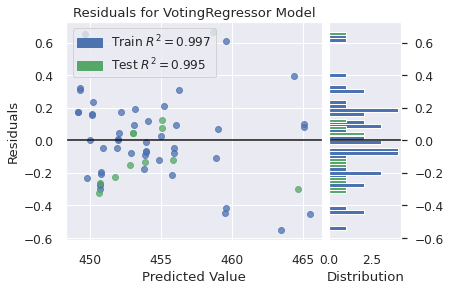

In [41]:
plot_model(final_model_1)

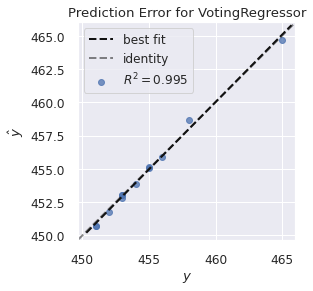

In [42]:
plot_model(final_model_1, plot='error')

In [43]:
evaluate_model(final_model_1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [44]:
! pip install explainerdashboard

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 305 kB 5.0 MB/s 
     |████████████████████████████████| 57 kB 5.7 MB/s 
     |████████████████████████████████| 46 kB 4.2 MB/s 
     |████████████████████████████████| 9.8 MB 45.1 MB/s 
     |████████████████████████████████| 569 kB 57.3 MB/s 
     |████████████████████████████████| 197 kB 74.2 MB/s 
     |████████████████████████████████| 61 kB 225 kB/s 
     |████████████████████████████████| 470 kB 48.8 MB/s 
     |████████████████████████████████| 64 kB 3.1 MB/s 
     |████████████████████████████████| 357 kB 47.0 MB/s 
     |████████████████████████████████| 136 kB 51.4 MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.6-py3-none-any.whl size=67326 sha256=24b16a438209381bc9c90935e98120d2e71151db083730cbdc1c1d4585373b9b
  Stored in directory: /root/.cache/pip/wheels/33/76/fe/99227ff871766e7284bb88d3d28e2f4886b8ec04d669033478
  Created w

In [45]:
dashboard(final_model_1)

Generating self.shap_explainer = shap.KernelExplainer(model, X)...
Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


  0%|          | 0/12 [00:00<?, ?it/s]

Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://172.28.0.2:8050
You can terminate the dashboard with ExplainerDashboard.terminate(8050)
Dash app running on:


<IPython.core.display.Javascript object>

In [46]:
dashboard(ada)

Generating self.shap_explainer = shap.KernelExplainer(model, X)...
Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


  0%|          | 0/12 [00:00<?, ?it/s]

Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://172.28.0.2:8050
You can terminate the dashboard with ExplainerDashboard.terminate(8050)
Dash app running on:


<IPython.core.display.Javascript object>

In [47]:
print(ada.feature_importances_)
print(et.feature_importances_)
print(rf.feature_importances_)
print(gbr.feature_importances_)

[0.02684804 0.39015685 0.58299511]
[0.37270489 0.35064122 0.2766539 ]
[0.03941913 0.4921532  0.46842766]
[0.03975721 0.37882369 0.5814191 ]


##4. Results

In [48]:
predict_model(final_model_1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.2066,0.07,0.2646,0.9948,0.0006,0.0005


,d(Å),FWHM,Crystallite size,Wavelength,Label
0,2.6379,0.350,23.732357,453,452.846398
1,2.6483,0.365,22.748768,455,455.076990
2,2.7187,0.341,24.292475,451,450.674280
3,2.6590,0.357,23.249865,454,453.867049
4,2.6406,0.369,22.508209,456,455.876305
5,2.6437,0.378,21.969902,458,458.664059
6,2.6376,0.344,24.146486,452,451.770624
7,2.6467,0.366,22.687878,455,455.120990
8,2.6285,0.381,21.808655,465,464.698728
9,2.7200,0.339,24.434786,451,450.737820


In [49]:
predict_model(final_model_2)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,1.2507,6.1896,2.4879,0.5434,0.0054,0.0027


,d(Å),FWHM,Crystallite size,Wavelength,Label
0,2.6379,0.350,23.732357,453,453.054606
1,2.6483,0.365,22.748768,455,456.212383
2,2.7187,0.341,24.292475,451,451.047789
3,2.6590,0.357,23.249865,454,454.340821
4,2.6406,0.369,22.508209,456,457.148323
5,2.6437,0.378,21.969902,458,457.611289
6,2.6376,0.344,24.146486,452,452.587937
7,2.6467,0.366,22.687878,455,456.389166
8,2.6285,0.381,21.808655,465,456.751253
9,2.7200,0.339,24.434786,451,450.475317


In [50]:
predict_model(ada)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,0.6943,0.6471,0.8044,0.9523,0.0018,0.0015


,d(Å),FWHM,Crystallite size,Wavelength,Label
0,2.6379,0.350,23.732357,453,452.500000
1,2.6483,0.365,22.748768,455,455.428571
2,2.7187,0.341,24.292475,451,449.545455
3,2.6590,0.357,23.249865,454,453.700000
4,2.6406,0.369,22.508209,456,455.555556
5,2.6437,0.378,21.969902,458,459.000000
6,2.6376,0.344,24.146486,452,451.750000
7,2.6467,0.366,22.687878,455,455.500000
8,2.6285,0.381,21.808655,465,464.000000
9,2.7200,0.339,24.434786,451,449.545455


In [51]:
predict_model(rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.4667,0.4532,0.6732,0.9666,0.0015,0.001


,d(Å),FWHM,Crystallite size,Wavelength,Label
0,2.6379,0.350,23.732357,453,452.39
1,2.6483,0.365,22.748768,455,454.93
2,2.7187,0.341,24.292475,451,449.83
3,2.6590,0.357,23.249865,454,453.97
4,2.6406,0.369,22.508209,456,455.96
5,2.6437,0.378,21.969902,458,459.44
6,2.6376,0.344,24.146486,452,451.66
7,2.6467,0.366,22.687878,455,455.15
8,2.6285,0.381,21.808655,465,464.41
9,2.7200,0.339,24.434786,451,449.94


In [52]:
predict_model(et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.4096,0.3807,0.617,0.9719,0.0013,0.0009


,d(Å),FWHM,Crystallite size,Wavelength,Label
0,2.6379,0.350,23.732357,453,452.640
1,2.6483,0.365,22.748768,455,454.850
2,2.7187,0.341,24.292475,451,450.020
3,2.6590,0.357,23.249865,454,453.840
4,2.6406,0.369,22.508209,456,456.000
5,2.6437,0.378,21.969902,458,459.360
6,2.6376,0.344,24.146486,452,452.070
7,2.6467,0.366,22.687878,455,455.050
8,2.6285,0.381,21.808655,465,463.950
9,2.7200,0.339,24.434786,451,450.315


In [53]:
predict_model(gbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.3733,0.3343,0.5782,0.9753,0.0013,0.0008


,d(Å),FWHM,Crystallite size,Wavelength,Label
0,2.6379,0.350,23.732357,453,452.686549
1,2.6483,0.365,22.748768,455,454.998190
2,2.7187,0.341,24.292475,451,449.895170
3,2.6590,0.357,23.249865,454,453.999251
4,2.6406,0.369,22.508209,456,455.984242
5,2.6437,0.378,21.969902,458,459.102030
6,2.6376,0.344,24.146486,452,451.711219
7,2.6467,0.366,22.687878,455,454.996255
8,2.6285,0.381,21.808655,465,464.371935
9,2.7200,0.339,24.434786,451,450.000246


In [54]:
predict_model(knn)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,0.6,0.82,0.9055,0.9395,0.002,0.0013


,d(Å),FWHM,Crystallite size,Wavelength,Label
0,2.6379,0.350,23.732357,453,452.4
1,2.6483,0.365,22.748768,455,455.0
2,2.7187,0.341,24.292475,451,450.6
3,2.6590,0.357,23.249865,454,453.8
4,2.6406,0.369,22.508209,456,455.8
5,2.6437,0.378,21.969902,458,460.4
6,2.6376,0.344,24.146486,452,451.0
7,2.6467,0.366,22.687878,455,455.4
8,2.6285,0.381,21.808655,465,463.6
9,2.7200,0.339,24.434786,451,450.4
